In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [1]:
import os
import sys
# sys.path.append('/home/thabib/Documents/Personal/Master_Thesis/1_HTMImplementation/ufuncs.py')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import time
import random
import time
import h5py
import collections

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive

from rebergrammar_generator_v3 import *
from experimentor_v4 import Experimentor
from ufuncs import full_pickle, unpickle, compress_pickle, decompress_pickle, get_idx_nonZeroElements

os.getcwd()
# np.set_printoptions(threshold=sys.maxsize)
#-----------------------------------------------------------------------------------------------

# Network params
k = 32
M = 16
N = k*7 # num_chars*k

# Cell params
maxDendritesPerCell = 128 # with 64 maxDendrites and maxSynapses, the performance reached was at 89.75% average.
maxSynapsesPerDendrite = 49 # (=32 + (18-1))
nmdaThreshold = 18
permThreshold = 0.50
learningThreshold = 11
permInit = 0.25
permInit_sd = 0.002

perm_decrement = 0.1 # p-
perm_increment = 2*perm_decrement # p+
perm_decay = 0.20*perm_decrement # p--

verbose = 1

# Generate Reber Strings For HTM Learning

In [2]:
# TO BE USED WHEN ONLY STRINGS ARE SPECIFICALLY SELECTED

# Keys are input strings. 
# Values are lists of expected output chars after each input char of the string.
reber_strings = {
    'ASPVSPXVPXSXPZ': [('S','T','V','P'), ('P'), ('V'), ('S'), ('P'), ('X'), ('V'), ('P'), ('X'), ('S'), ('X'), ('P'), ('Z')],
    'ATPVSPXVPXSXVZ': [('S','T','V','P'), ('P'), ('V'), ('S'), ('P'), ('X'), ('V'), ('P'), ('X'), ('S'), ('X'), ('V'), ('Z')],
    'AVPVSPXVPXSXSZ': [('S','T','V','P'), ('P'), ('V'), ('S'), ('P'), ('X'), ('V'), ('P'), ('X'), ('S'), ('X'), ('S'), ('Z')],
    'APVSPXVPXSXZ': [('S','T','V','P'), ('V'), ('S'), ('P'), ('X'), ('V'), ('P'), ('X'), ('S'), ('X'), ('Z')]
}

# reber_strings = {
#     'ATSPVZ': [('T','P'), ('S','P'), ('P'), ('V'), ('Z')],
#     'APSTTXZ': [('T','P'), ('S','V'), ('T'), ('T'), ('X'), ('Z')],
#     'APVPVZ': [('T','P'), ('S','V'), ('P'), ('V'), ('Z')],
#     'ATPXSXZ': [('T','P'), ('S','P'), ('X'), ('S'), ('X'), ('Z')]
# }

# reber_strings = {
#     'APVPVZ': [('P'), ('V'), ('P'), ('V'), ('Z')]
# }

In [3]:
# Task params
graph = '2' # '2' is the graph used in the study

rg = Reber_Grammar(numColumns=N, columnsPerChar=k, graph=graph)
charsMC = rg.df_CharsToMinicols

do_ERG = False
nof_strings = 500

#reber_strings = 'mix'

string_max_length = None
sort_by_length = False

# Generating Input Strings and Predictions
rg_inputoutput = rg.generate_RGInputOutput(do_ERG, nof_strings, reber_strings, string_max_length, sort_by_length)

### Input String Statistics

A total of 500 strings were generated. 

With: 
NOF characters in total = 6750. 
Mean length of string = 13.5. 
Median length of string = 14.0. 

 Unique Strings = ['APVSPXVPXSXZ' 'ASPVSPXVPXSXPZ' 'ATPVSPXVPXSXVZ' 'AVPVSPXVPXSXSZ']. 
NOF Unique Strings = 4.


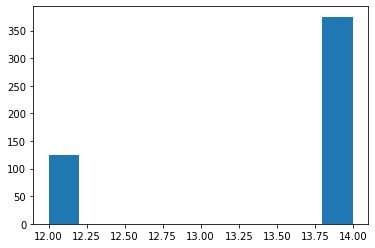

0 APVSPXVPXSXZ
1 ATPVSPXVPXSXVZ
2 ATPVSPXVPXSXVZ
3 ATPVSPXVPXSXVZ
4 ATPVSPXVPXSXVZ
5 AVPVSPXVPXSXSZ
6 AVPVSPXVPXSXSZ
7 ATPVSPXVPXSXVZ
8 AVPVSPXVPXSXSZ
9 APVSPXVPXSXZ
10 AVPVSPXVPXSXSZ
11 ATPVSPXVPXSXVZ
12 ATPVSPXVPXSXVZ
13 APVSPXVPXSXZ
14 AVPVSPXVPXSXSZ
15 AVPVSPXVPXSXSZ
16 ASPVSPXVPXSXPZ
17 ASPVSPXVPXSXPZ
18 ATPVSPXVPXSXVZ
19 AVPVSPXVPXSXSZ
20 ATPVSPXVPXSXVZ
21 ATPVSPXVPXSXVZ
22 ASPVSPXVPXSXPZ
23 ASPVSPXVPXSXPZ
24 ATPVSPXVPXSXVZ
25 AVPVSPXVPXSXSZ
26 APVSPXVPXSXZ
27 ASPVSPXVPXSXPZ
28 ASPVSPXVPXSXPZ
29 APVSPXVPXSXZ
30 ATPVSPXVPXSXVZ
31 ATPVSPXVPXSXVZ
32 AVPVSPXVPXSXSZ
33 ATPVSPXVPXSXVZ
34 APVSPXVPXSXZ
35 ASPVSPXVPXSXPZ
36 ASPVSPXVPXSXPZ
37 AVPVSPXVPXSXSZ
38 APVSPXVPXSXZ
39 ATPVSPXVPXSXVZ
40 AVPVSPXVPXSXSZ
41 ASPVSPXVPXSXPZ
42 ASPVSPXVPXSXPZ
43 AVPVSPXVPXSXSZ
44 ATPVSPXVPXSXVZ
45 AVPVSPXVPXSXSZ
46 APVSPXVPXSXZ
47 APVSPXVPXSXZ
48 ASPVSPXVPXSXPZ
49 ASPVSPXVPXSXPZ
50 ASPVSPXVPXSXPZ
51 AVPVSPXVPXSXSZ
52 ASPVSPXVPXSXPZ
53 ASPVSPXVPXSXPZ
54 ATPVSPXVPXSXVZ
55 APVSPXVPXSXZ
56 APVSPXVPXSXZ
57 ASP

In [4]:
in_strings_alpha = [rg_inputoutput[i][0] for i in range(len(rg_inputoutput))]
dict_count_allTransitions = rg.count_allTransitions(in_strings_alpha)

# NOF TOTAL CHARACTERS in the input stream
total_len_inputstream = 0
for string in in_strings_alpha:
    total_len_inputstream += len(string)
    
# Plotting HISTOGRAM of REBER STRING's LENGTH
len_rg_exs = []

for ex in in_strings_alpha:
    len_rg_exs.append(len(ex))

print(f'A total of {len(in_strings_alpha)} strings were generated. \n\n\
With: \n\
NOF characters in total = {total_len_inputstream}. \n\
Mean length of string = {np.mean(len_rg_exs)}. \n\
Median length of string = {np.median(len_rg_exs)}. \n\
\n Unique Strings = {np.unique(in_strings_alpha)}. \n\
NOF Unique Strings = {len(np.unique(in_strings_alpha))}.')

plt.figure()
plt.hist(len_rg_exs)
plt.show()
    
# Printing all input reber strings    
for i, string in enumerate(in_strings_alpha):
    print(i, string)

# Generating xticks for plots based on characters-minicols
xticks_plot = np.empty(N, dtype=object)
for ch in chars:
    xticks_plot[charsMC[ch]] = ch

# Running Experiment

In [6]:
dict_params = {
    'M': M,
    'N': N,
    'k': k,
    'maxDendritesPerCell': maxDendritesPerCell,
    'maxSynapsesPerDendrite': maxSynapsesPerDendrite,
    'nmdaThreshold': nmdaThreshold,
    'permThreshold': permThreshold,
    'learningThreshold': learningThreshold,
    'permInit': permInit,
    'permInit_sd': permInit_sd,
    'perm_decrement': perm_decrement,
    'perm_increment': perm_increment,
    'perm_decay': perm_decay,
    'do_ERG': do_ERG,
    'nof_strings': nof_strings,
    'reber_strings': reber_strings,
    'string_max_length': string_max_length,
    'sort_by_length': sort_by_length,
    'verbose': verbose,
}

start = time.time()

exp = Experimentor(cellsPerColumn=M, numColumns=N, columnsPerChar=k, 
                   maxDendritesPerCell=maxDendritesPerCell, maxSynapsesPerDendrite=maxSynapsesPerDendrite, 
                   nmdaThreshold=nmdaThreshold, permThreshold=permThreshold,
                   learningThreshold=learningThreshold,
                   permInit=permInit, permInit_sd = permInit_sd,
                   perm_decrement=perm_decrement, perm_increment=perm_increment, perm_decay=perm_decay,
                   rg=rg, rg_inputoutput=rg_inputoutput,
                   htm_network=None,
                   verbose=verbose)

dict_results = exp.run_experiment()

print(time.time()-start)

# sys.getsizeof(dict_results['results'])

results = dict_results['results']
results.set_index('reber_string', inplace=True)
final_net = dict_results['final_net']


  String_idx:  0  Input String:  APVSPXVPXSXZ

  String_idx:  1  Input String:  ATPVSPXVPXSXVZ
  :::::::::::::::::::::::::::::::::::::::::::Issue 003 in col:  1  :::::::::::::::::::::::::::::::::::::::::::  
[((13, 0), 32), ((14, 0), 32)]
  ::::::::::::::::::::::::::::::::::Issue 005 in step:  6 ::::::::::::::::::::::::::::::::::  

  String_idx:  2  Input String:  ATPVSPXVPXSXVZ
  :::::::::::::::::::::::::::::::::::::::::::Issue 003 in col:  2  :::::::::::::::::::::::::::::::::::::::::::  
[((11, 0), 32), ((15, 0), 32)]
  ::::::::::::::::::::::::::::::::::Issue 005 in step:  3 ::::::::::::::::::::::::::::::::::  

  String_idx:  3  Input String:  ATPVSPXVPXSXVZ
  :::::::::::::::::::::::::::::::::::::::::::Issue 003 in col:  2  :::::::::::::::::::::::::::::::::::::::::::  
[((11, 0), 32), ((15, 0), 32)]
  ::::::::::::::::::::::::::::::::::Issue 005 in step:  3 ::::::::::::::::::::::::::::::::::  

  String_idx:  4  Input String:  ATPVSPXVPXSXVZ
  ::::::::::::::::::::::::::::::::::::::


  String_idx:  27  Input String:  ASPVSPXVPXSXPZ
  :::::::::::::::::::::::::::::::::::::::::::Issue 003 in col:  3  :::::::::::::::::::::::::::::::::::::::::::  
[((2, 0), 32), ((10, 0), 32)]
  ::::::::::::::::::::::::::::::::::Issue 005 in step:  10 ::::::::::::::::::::::::::::::::::  

  String_idx:  28  Input String:  ASPVSPXVPXSXPZ
  :::::::::::::::::::::::::::::::::::::::::::Issue 003 in col:  3  :::::::::::::::::::::::::::::::::::::::::::  
[((2, 0), 32), ((10, 0), 32)]
  ::::::::::::::::::::::::::::::::::Issue 005 in step:  10 ::::::::::::::::::::::::::::::::::  

  String_idx:  29  Input String:  APVSPXVPXSXZ
  :::::::::::::::::::::::::::::::::::::::::::Issue 003 in col:  1  :::::::::::::::::::::::::::::::::::::::::::  
[((1, 0), 32), ((9, 0), 32)]
  ::::::::::::::::::::::::::::::::::Issue 005 in step:  10 ::::::::::::::::::::::::::::::::::  

  String_idx:  30  Input String:  ATPVSPXVPXSXVZ
  :::::::::::::::::::::::::::::::::::::::::::Issue 003 in col:  1  :::::::::::::::::::


  String_idx:  103  Input String:  APVSPXVPXSXZ

  String_idx:  104  Input String:  ASPVSPXVPXSXPZ

  String_idx:  105  Input String:  AVPVSPXVPXSXSZ

  String_idx:  106  Input String:  AVPVSPXVPXSXSZ

  String_idx:  107  Input String:  ASPVSPXVPXSXPZ

  String_idx:  108  Input String:  APVSPXVPXSXZ

  String_idx:  109  Input String:  APVSPXVPXSXZ

  String_idx:  110  Input String:  ATPVSPXVPXSXVZ

  String_idx:  111  Input String:  ASPVSPXVPXSXPZ

  String_idx:  112  Input String:  AVPVSPXVPXSXSZ

  String_idx:  113  Input String:  ASPVSPXVPXSXPZ

  String_idx:  114  Input String:  AVPVSPXVPXSXSZ

  String_idx:  115  Input String:  AVPVSPXVPXSXSZ

  String_idx:  116  Input String:  APVSPXVPXSXZ

  String_idx:  117  Input String:  APVSPXVPXSXZ

  String_idx:  118  Input String:  APVSPXVPXSXZ

  String_idx:  119  Input String:  ASPVSPXVPXSXPZ

  String_idx:  120  Input String:  APVSPXVPXSXZ

  String_idx:  121  Input String:  AVPVSPXVPXSXSZ

  String_idx:  122  Input String:  AVPVSPXVP


  String_idx:  244  Input String:  APVSPXVPXSXZ

  String_idx:  245  Input String:  ATPVSPXVPXSXVZ

  String_idx:  246  Input String:  AVPVSPXVPXSXSZ

  String_idx:  247  Input String:  AVPVSPXVPXSXSZ

  String_idx:  248  Input String:  ATPVSPXVPXSXVZ

  String_idx:  249  Input String:  AVPVSPXVPXSXSZ

  String_idx:  250  Input String:  ASPVSPXVPXSXPZ

  String_idx:  251  Input String:  APVSPXVPXSXZ

  String_idx:  252  Input String:  ATPVSPXVPXSXVZ

  String_idx:  253  Input String:  APVSPXVPXSXZ

  String_idx:  254  Input String:  APVSPXVPXSXZ

  String_idx:  255  Input String:  AVPVSPXVPXSXSZ

  String_idx:  256  Input String:  AVPVSPXVPXSXSZ

  String_idx:  257  Input String:  APVSPXVPXSXZ

  String_idx:  258  Input String:  ASPVSPXVPXSXPZ

  String_idx:  259  Input String:  AVPVSPXVPXSXSZ

  String_idx:  260  Input String:  APVSPXVPXSXZ

  String_idx:  261  Input String:  ATPVSPXVPXSXVZ

  String_idx:  262  Input String:  ATPVSPXVPXSXVZ

  String_idx:  263  Input String:  AVPVSPX


  String_idx:  385  Input String:  AVPVSPXVPXSXSZ

  String_idx:  386  Input String:  APVSPXVPXSXZ

  String_idx:  387  Input String:  ATPVSPXVPXSXVZ

  String_idx:  388  Input String:  ASPVSPXVPXSXPZ

  String_idx:  389  Input String:  ATPVSPXVPXSXVZ

  String_idx:  390  Input String:  APVSPXVPXSXZ

  String_idx:  391  Input String:  ATPVSPXVPXSXVZ

  String_idx:  392  Input String:  ATPVSPXVPXSXVZ

  String_idx:  393  Input String:  AVPVSPXVPXSXSZ

  String_idx:  394  Input String:  AVPVSPXVPXSXSZ

  String_idx:  395  Input String:  ATPVSPXVPXSXVZ

  String_idx:  396  Input String:  APVSPXVPXSXZ

  String_idx:  397  Input String:  ATPVSPXVPXSXVZ

  String_idx:  398  Input String:  APVSPXVPXSXZ

  String_idx:  399  Input String:  AVPVSPXVPXSXSZ

  String_idx:  400  Input String:  ASPVSPXVPXSXPZ

  String_idx:  401  Input String:  ASPVSPXVPXSXPZ

  String_idx:  402  Input String:  ASPVSPXVPXSXPZ

  String_idx:  403  Input String:  ASPVSPXVPXSXPZ

  String_idx:  404  Input String:  ASP

# Measuring Performance

**Prediction Accuracy:** #correctly predicted cols / #predicted cols 
- Prediction accuracy will be 1.0 if there is only 1 column predicted by the network and that one column is one out of the (say) 50 expected predicted columns, because 1/1 = 1.0. 
- Hence, it only makes sense to compute prediction accuracy when the number of columns predicted by the network is higher than or equal to the expected number of correctly predicted columns.

**Prediction Performance:**  moving average over the last 100 sequences

In [7]:
# Generating xticks for plots based on characters-minicols
xticks_plot = np.empty(N, dtype=object)
for ch in chars:
    xticks_plot[charsMC[ch]] = ch


c = 0
for i in results['issue']:
    if i == 'nan':
        c+=1
    else:
        continue
        
#results.iloc[1996]
c

468

In [8]:
pred_acc = []
pred_perf = []
pred_perf_perString = []

for string_idx in range(len(in_strings_alpha)):
    
    performancePerString = []
    
    for step in range(len(results.iloc[string_idx]['htm_preds'])):
        
        correct_preds_cols_idx = np.where(rg_inputoutput[string_idx][2][step])[0]
        # Correct expected predictions for the particular <[string_idx][step]> timestep
        
        predicted_cols_idx = np.unique(np.where(results.iloc[string_idx]['htm_preds'][step])[1])
        # Indices of the cols predicted by the network for particular <[string_idx][step]> timestep.
        
        count=0
        for col_idx in correct_preds_cols_idx:
            if col_idx in predicted_cols_idx:
                count+=1

        if len(predicted_cols_idx) == 0:
            accuracy = 0.0
        else:
            accuracy = (count/len(predicted_cols_idx))*100
        
        performance = (count/len(correct_preds_cols_idx))*100
        
        pred_acc.append((accuracy, (string_idx, step)))
        pred_perf.append((performance, (string_idx, step)))
        performancePerString.append(performance)
        
    pred_perf_perString.append(np.mean(performancePerString))
    
        
MA_pred_perf = []
MA_pred_acc = []
i = 0
while i+100 < len(pred_acc):
    
    MA_pred_perf.append(np.mean([perf_[0] for perf_ in pred_perf[i:i+100]]))
    MA_pred_acc.append(np.mean([acc_[0] for acc_ in pred_acc[i:i+100]]))
    
    i+=1

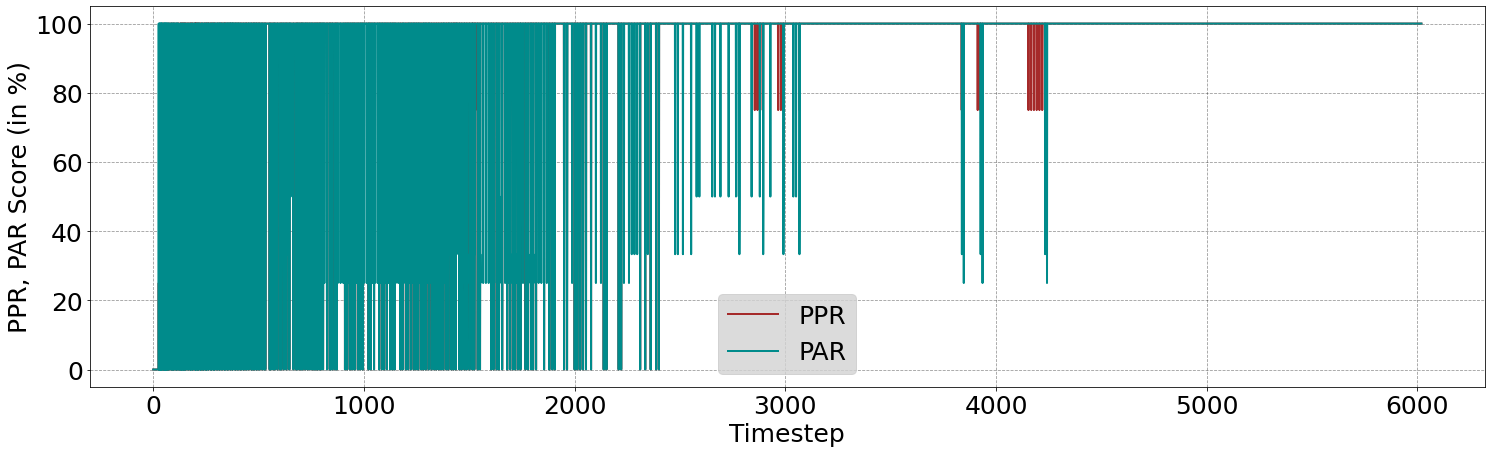

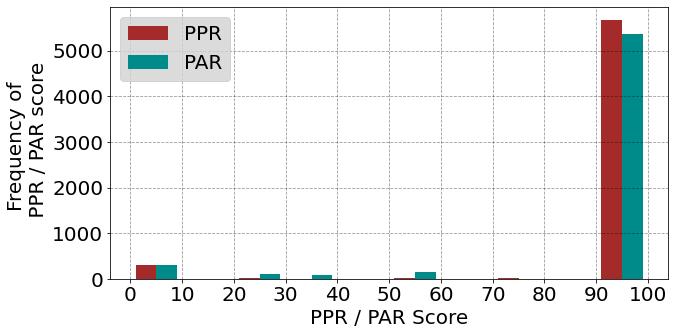

In [9]:
plt.figure(figsize=(25,7))
plt.plot([perf_[0] for perf_ in pred_perf], label='PPR', color='brown', lw=2)
plt.plot([acc_[0] for acc_ in pred_acc], label='PAR', color='darkcyan', lw=2)
plt.ylabel('PPR, PAR Score (in %)', fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Timestep', fontsize=25)
plt.xticks(fontsize=25)
plt.legend(loc='lower center', facecolor='lightgrey', fontsize=25)
plt.grid(True, linestyle="--", color='black', alpha=0.4)
#plt.title(f'Mean prediction accuracy (in %): {np.mean([pred_[0] for pred_ in pred_acc])}')
plt.show()

#____________________________FREQUENCY BAR PLOTS_________________________________________
plt.figure(figsize=(10,5))
plt.hist([[perf_[0] for perf_ in pred_perf],[acc_[0] for acc_ in pred_acc]], bins=np.arange(0,110,10),
         color=['brown', 'darkcyan'], label=['PPR', 'PAR'])
plt.ylabel('Frequency of \n PPR / PAR score', fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('PPR / PAR Score', fontsize=20)
plt.xticks(np.arange(0,110,10), fontsize=20)
plt.legend(loc='upper left', facecolor='lightgrey', fontsize=20)
plt.grid(True, linestyle="--", color='black', alpha=0.4)
plt.show()
plt.close()

# count_PAR = collections.Counter([acc_[0] for acc_ in pred_acc])
# count_PPR = collections.Counter([perf_[0] for perf_ in pred_perf])

# print('\n\nPAR Frequencies: ')
# for key in sorted(dict(count_PAR).keys()):
#     print(key,':: ', dict(count_PAR)[key])
    
# print('\n\nPPR Frequencies: ')
# for key in sorted(dict(count_PPR).keys()):
#     print(key,':: ', dict(count_PPR)[key])

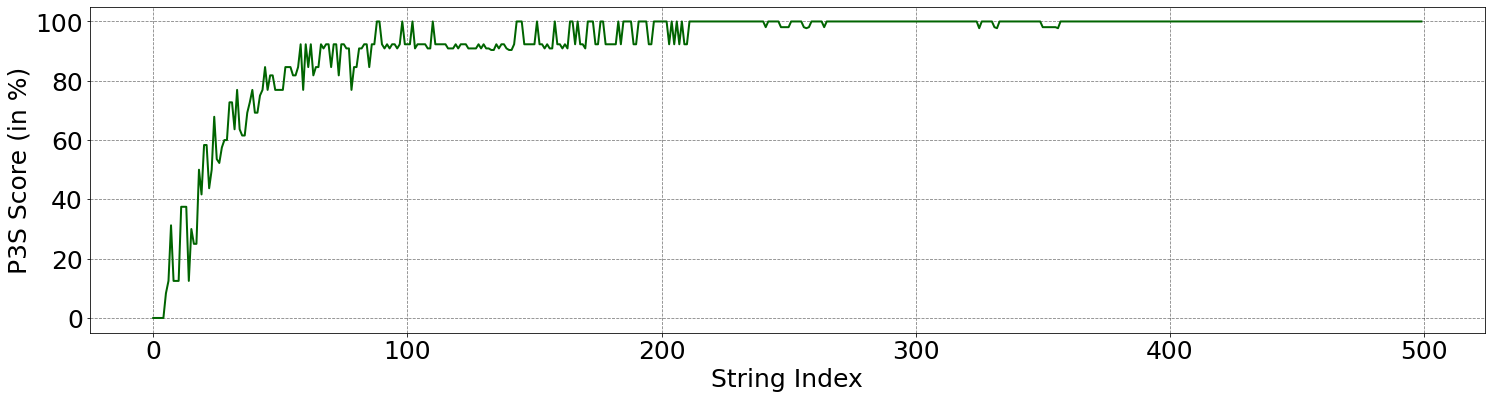

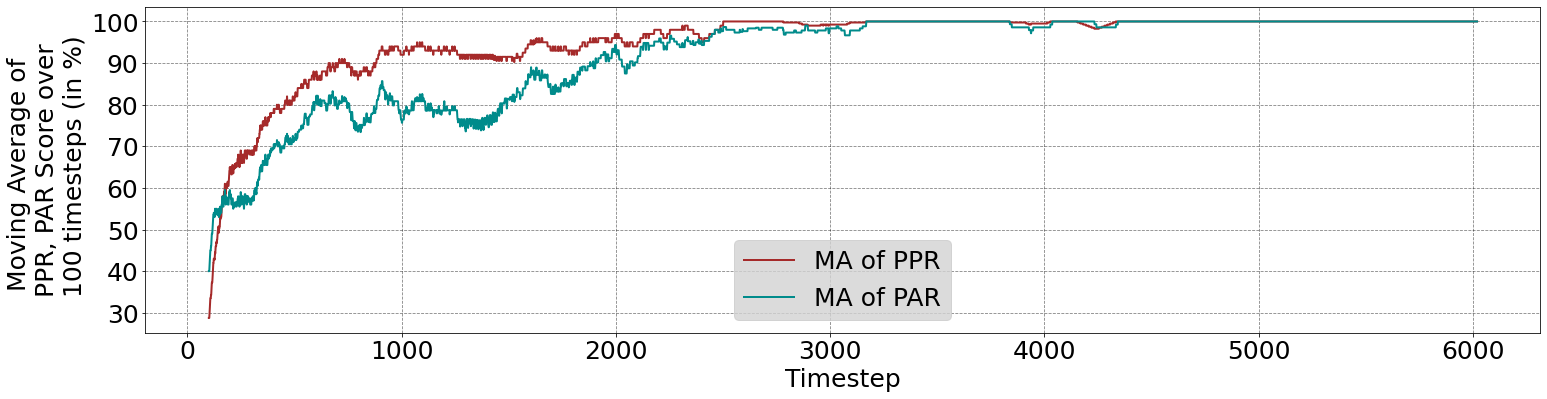

In [10]:
# ____________________PLOTTING P3S SCORE_________________
plt.figure(figsize=(25,6))
plt.plot(pred_perf_perString, label='PPR', color='darkgreen', lw=2)
plt.ylabel('P3S Score (in %)', fontsize=25)
#plt.ylabel('Prediction Performance \n Per String (in %)', fontsize=25)
#plt.text(x=0, y=0, s='Prediction Performance Per String (in %)', wrap=True)
plt.yticks(fontsize=25)
plt.xlabel('String Index', fontsize=25)
plt.xticks(fontsize=25)
plt.grid(True, linestyle="--", color='black', alpha=0.5)
plt.show()
plt.close()

# ____________________FREQUENCY BAR PLOT FOR P3S SCORE_________________
# plt.figure(figsize=(10,5))
# plt.hist(pred_perf_perString, color='darkgreen')
# plt.ylabel('Frequency of P3S', fontsize=20)
# plt.yticks(fontsize=20)
# plt.xlabel('P3S', fontsize=20)
# plt.xticks(fontsize=20)
# plt.show()

# ____________________PLOTTING MOVING AVERAGE OF PAR AND PPR SCORES_________________
plt.figure(figsize=(25,6))
plt.plot(np.arange(100, len(MA_pred_perf)+100), MA_pred_perf, label='MA of PPR', color='brown', lw=2)
plt.plot(np.arange(100, len(MA_pred_acc)+100), MA_pred_acc, label='MA of PAR', color='darkcyan', lw=2)
plt.ylabel('Moving Average of \n PPR, PAR Score over \n 100 timesteps (in %)', fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Timestep', fontsize=25)
plt.xticks(fontsize=25)
plt.legend(loc='lower center', facecolor='lightgrey', fontsize=25)
plt.grid(True, linestyle="--", color='black', alpha=0.5)
plt.show()
plt.close()

In [20]:
#display(np.mean(pred_perf_perString[00:]))
display(np.mean(MA_pred_perf[12000:]))
display(np.mean(MA_pred_acc[12000:]))

/home/thabib/anaconda3/envs/tahresearch/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/thabib/anaconda3/envs/tahresearch/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

nan

nan

In [43]:
pred_acc[4000:4600]

[(100.0, (320, 0)),
 (100.0, (320, 1)),
 (100.0, (320, 2)),
 (100.0, (320, 3)),
 (100.0, (320, 4)),
 (100.0, (320, 5)),
 (100.0, (320, 6)),
 (100.0, (320, 7)),
 (100.0, (320, 8)),
 (100.0, (320, 9)),
 (100.0, (320, 10)),
 (100.0, (320, 11)),
 (100.0, (320, 12)),
 (100.0, (321, 0)),
 (100.0, (321, 1)),
 (100.0, (321, 2)),
 (100.0, (321, 3)),
 (100.0, (321, 4)),
 (100.0, (321, 5)),
 (100.0, (321, 6)),
 (100.0, (321, 7)),
 (100.0, (321, 8)),
 (100.0, (321, 9)),
 (100.0, (321, 10)),
 (50.0, (321, 11)),
 (100.0, (321, 12)),
 (100.0, (322, 0)),
 (100.0, (322, 1)),
 (100.0, (322, 2)),
 (100.0, (322, 3)),
 (100.0, (322, 4)),
 (100.0, (322, 5)),
 (100.0, (322, 6)),
 (100.0, (322, 7)),
 (100.0, (322, 8)),
 (100.0, (322, 9)),
 (100.0, (322, 10)),
 (50.0, (322, 11)),
 (100.0, (322, 12)),
 (100.0, (323, 0)),
 (100.0, (323, 1)),
 (100.0, (323, 2)),
 (100.0, (323, 3)),
 (100.0, (323, 4)),
 (100.0, (323, 5)),
 (100.0, (323, 6)),
 (100.0, (323, 7)),
 (100.0, (323, 8)),
 (100.0, (323, 9)),
 (100.0, (323

In [44]:
pred_perf[4400:4600]

[(100.0, (351, 5)),
 (100.0, (351, 6)),
 (100.0, (351, 7)),
 (100.0, (351, 8)),
 (100.0, (351, 9)),
 (100.0, (351, 10)),
 (100.0, (351, 11)),
 (100.0, (351, 12)),
 (75.0, (352, 0)),
 (100.0, (352, 1)),
 (100.0, (352, 2)),
 (100.0, (352, 3)),
 (100.0, (352, 4)),
 (100.0, (352, 5)),
 (100.0, (352, 6)),
 (100.0, (352, 7)),
 (100.0, (352, 8)),
 (100.0, (352, 9)),
 (100.0, (352, 10)),
 (100.0, (352, 11)),
 (100.0, (352, 12)),
 (75.0, (353, 0)),
 (100.0, (353, 1)),
 (100.0, (353, 2)),
 (100.0, (353, 3)),
 (100.0, (353, 4)),
 (100.0, (353, 5)),
 (100.0, (353, 6)),
 (100.0, (353, 7)),
 (100.0, (353, 8)),
 (100.0, (353, 9)),
 (100.0, (353, 10)),
 (100.0, (353, 11)),
 (100.0, (353, 12)),
 (75.0, (354, 0)),
 (100.0, (354, 1)),
 (100.0, (354, 2)),
 (100.0, (354, 3)),
 (100.0, (354, 4)),
 (100.0, (354, 5)),
 (100.0, (354, 6)),
 (100.0, (354, 7)),
 (100.0, (354, 8)),
 (100.0, (354, 9)),
 (100.0, (354, 10)),
 (100.0, (354, 11)),
 (100.0, (354, 12)),
 (75.0, (355, 0)),
 (100.0, (355, 1)),
 (100.0, (35

In [27]:
# Printing all input reber strings for trial 1
for i, string in enumerate(in_strings_alpha):
    print(i, string)

0 APVSPXVPXSXZ
1 ATPVSPXVPXSXTZ
2 ATPVSPXVPXSXTZ
3 ATPVSPXVPXSXTZ
4 ATPVSPXVPXSXTZ
5 AVPVSPXVPXSXVZ
6 AVPVSPXVPXSXVZ
7 ATPVSPXVPXSXTZ
8 AVPVSPXVPXSXVZ
9 APVSPXVPXSXZ
10 AVPVSPXVPXSXVZ
11 ATPVSPXVPXSXTZ
12 ATPVSPXVPXSXTZ
13 APVSPXVPXSXZ
14 AVPVSPXVPXSXVZ
15 AVPVSPXVPXSXVZ
16 ASPVSPXVPXSXSZ
17 ASPVSPXVPXSXSZ
18 ATPVSPXVPXSXTZ
19 AVPVSPXVPXSXVZ
20 ATPVSPXVPXSXTZ
21 ATPVSPXVPXSXTZ
22 ASPVSPXVPXSXSZ
23 ASPVSPXVPXSXSZ
24 ATPVSPXVPXSXTZ
25 AVPVSPXVPXSXVZ
26 APVSPXVPXSXZ
27 ASPVSPXVPXSXSZ
28 ASPVSPXVPXSXSZ
29 APVSPXVPXSXZ
30 ATPVSPXVPXSXTZ
31 ATPVSPXVPXSXTZ
32 AVPVSPXVPXSXVZ
33 ATPVSPXVPXSXTZ
34 APVSPXVPXSXZ
35 ASPVSPXVPXSXSZ
36 ASPVSPXVPXSXSZ
37 AVPVSPXVPXSXVZ
38 APVSPXVPXSXZ
39 ATPVSPXVPXSXTZ
40 AVPVSPXVPXSXVZ
41 ASPVSPXVPXSXSZ
42 ASPVSPXVPXSXSZ
43 AVPVSPXVPXSXVZ
44 ATPVSPXVPXSXTZ
45 AVPVSPXVPXSXVZ
46 APVSPXVPXSXZ
47 APVSPXVPXSXZ
48 ASPVSPXVPXSXSZ
49 ASPVSPXVPXSXSZ
50 ASPVSPXVPXSXSZ
51 AVPVSPXVPXSXVZ
52 ASPVSPXVPXSXSZ
53 ASPVSPXVPXSXSZ
54 ATPVSPXVPXSXTZ
55 APVSPXVPXSXZ
56 APVSPXVPXSXZ
57 ASP

## HTM States / Activity

In [29]:
%matplotlib inline

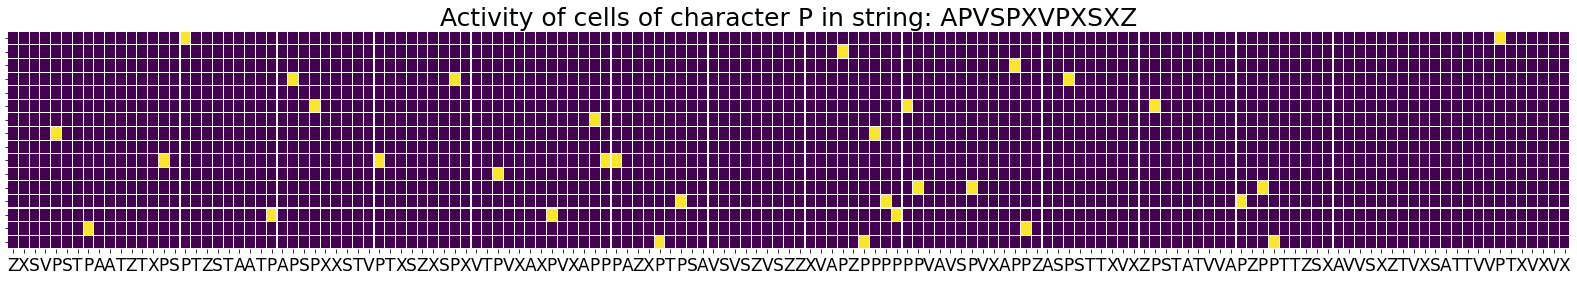

In [35]:
string_idx = 496
step = 1

res_string = results.iloc[string_idx]
all_cols = [c for c in range(N)]
char = res_string.name[step]
inactive_cols = [col for col in all_cols if res_string['htm_states'][step][:, col].any()==False]
deleted_cols = random.choices(inactive_cols, k=int(len(inactive_cols)/1.8))
undeleted_cols = set(all_cols) - set(deleted_cols)

f = plt.figure(figsize=(28,4))
f = sns.heatmap(res_string['htm_states'][step][:, list(undeleted_cols)], 
                linewidth=0.1, cmap='viridis', vmax=1, vmin=0, cbar=False, xticklabels=xticks_plot[list(undeleted_cols)])
f.set_xticklabels(f.get_xticklabels(), fontsize=17)
f.set_yticklabels([])
f.set_title(f'Activity of cells of character {char} in string: {res_string.name}', fontsize=25)

# ax_ = plt.twiny()
# ax_.set_xticks(f.get_xticks())
# ax_.set_xbound(f.get_xbound())
# ax_.set_xticklabels([str(i) for i in np.arange(N)], rotation=90, fontsize=8)
# ax_.tick_params(grid_alpha=0)
plt.show()

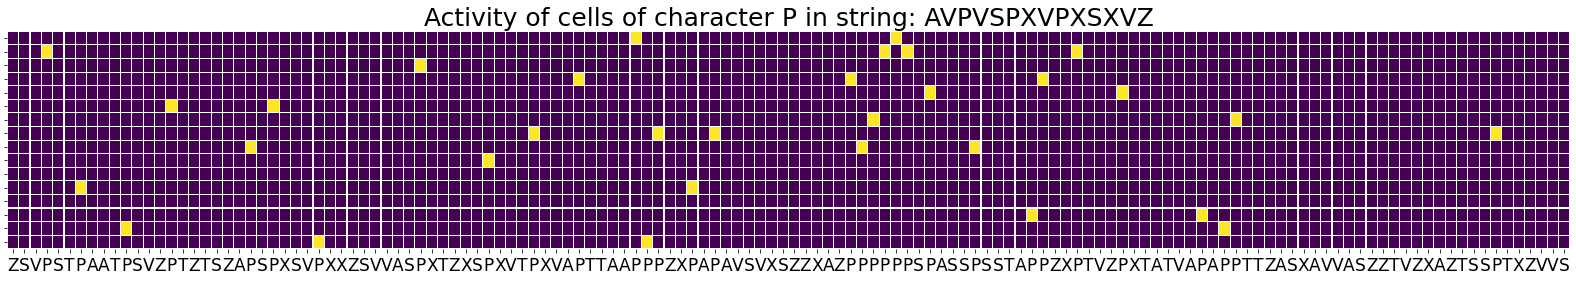

In [36]:
string_idx = 498
step = 2

res_string = results.iloc[string_idx]
all_cols = [c for c in range(N)]
char = res_string.name[step]
inactive_cols = [col for col in all_cols if res_string['htm_states'][step][:, col].any()==False]
deleted_cols = random.choices(inactive_cols, k=int(len(inactive_cols)/1.8))
undeleted_cols = set(all_cols) - set(deleted_cols)

f = plt.figure(figsize=(28,4))
f = sns.heatmap(res_string['htm_states'][step][:, list(undeleted_cols)], 
                linewidth=0.1, cmap='viridis', vmax=1, vmin=0, cbar=False, xticklabels=xticks_plot[list(undeleted_cols)])
f.set_xticklabels(f.get_xticklabels(), fontsize=17)
f.set_yticklabels([])
f.set_title(f'Activity of cells of character {char} in string: {res_string.name}', fontsize=25)

# ax_ = plt.twiny()
# ax_.set_xticks(f.get_xticks())
# ax_.set_xbound(f.get_xbound())
# ax_.set_xticklabels([str(i) for i in np.arange(N)], rotation=90, fontsize=8)
# ax_.tick_params(grid_alpha=0)
plt.show()

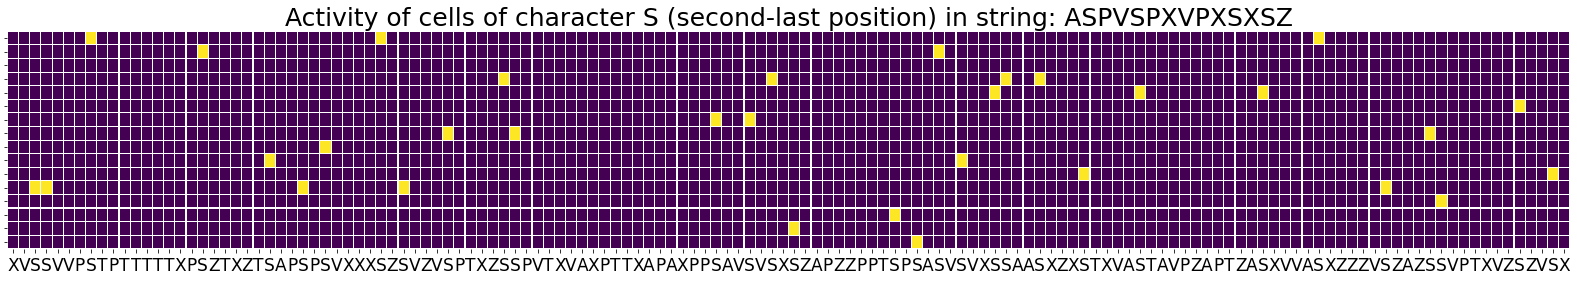

In [65]:
string_idx = 491
step = 12

res_string = results.iloc[string_idx]
all_cols = [c for c in range(N)]
char = res_string.name[step]
inactive_cols = [col for col in all_cols if res_string['htm_states'][step][:, col].any()==False]
deleted_cols = random.choices(inactive_cols, k=int(len(inactive_cols)/1.8))
undeleted_cols = set(all_cols) - set(deleted_cols)

f = plt.figure(figsize=(28,4))
f = sns.heatmap(res_string['htm_states'][step][:, list(undeleted_cols)], 
                linewidth=0.1, cmap='viridis', vmax=1, vmin=0, cbar=False, xticklabels=xticks_plot[list(undeleted_cols)])
f.set_xticklabels(f.get_xticklabels(), fontsize=17)
f.set_yticklabels([])
f.set_title(f'Activity of cells of character {char} (second-last position) in string: {res_string.name}', fontsize=25)

# ax_ = plt.twiny()
# ax_.set_xticks(f.get_xticks())
# ax_.set_xbound(f.get_xbound())
# ax_.set_xticklabels([str(i) for i in np.arange(N)], rotation=90, fontsize=8)
# ax_.tick_params(grid_alpha=0)
plt.show()

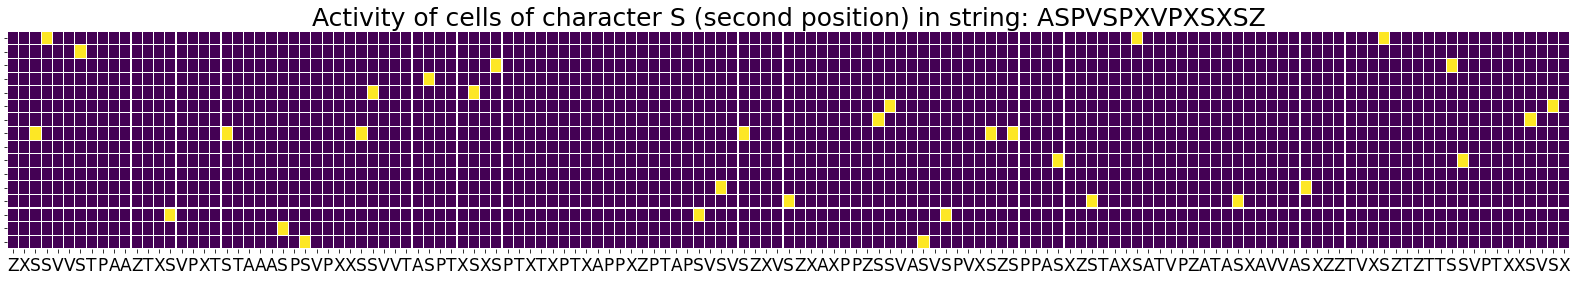

In [64]:
string_idx = 491
step = 1

res_string = results.iloc[string_idx]
all_cols = [c for c in range(N)]
char = res_string.name[step]
inactive_cols = [col for col in all_cols if res_string['htm_states'][step][:, col].any()==False]
deleted_cols = random.choices(inactive_cols, k=int(len(inactive_cols)/1.8))
undeleted_cols = set(all_cols) - set(deleted_cols)

f = plt.figure(figsize=(28,4))
f = sns.heatmap(res_string['htm_states'][step][:, list(undeleted_cols)], 
                linewidth=0.1, cmap='viridis', vmax=1, vmin=0, cbar=False, xticklabels=xticks_plot[list(undeleted_cols)])
f.set_xticklabels(f.get_xticklabels(), fontsize=17)
f.set_yticklabels([])
f.set_title(f'Activity of cells of character {char} (second position) in string: {res_string.name}', fontsize=25)

# ax_ = plt.twiny()
# ax_.set_xticks(f.get_xticks())
# ax_.set_xbound(f.get_xbound())
# ax_.set_xticklabels([str(i) for i in np.arange(N)], rotation=90, fontsize=8)
# ax_.tick_params(grid_alpha=0)
plt.show()

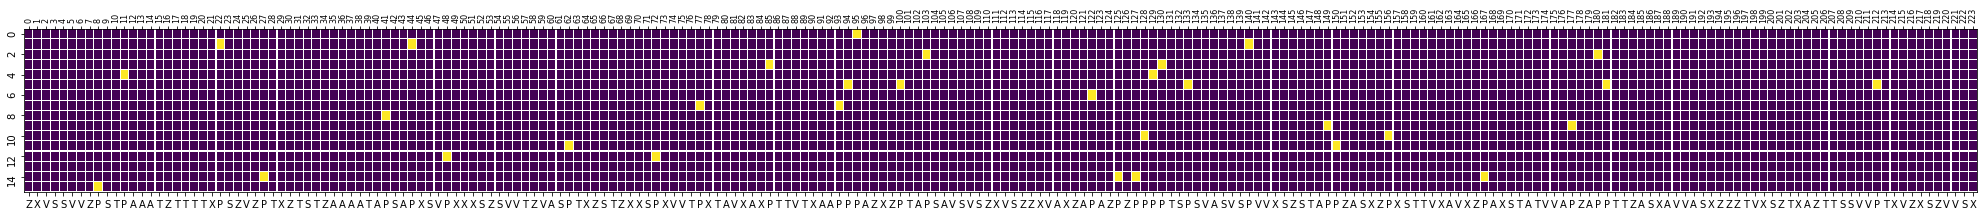

In [27]:
string_idx = 7

sns.set_style("whitegrid")
res_string = results.iloc[string_idx]
string_len = len(res_string.name)
fig, axes = plt.subplots(string_len,1, figsize=(24,3*string_len))
all_cols = [c for c in range(N)]

for step in range(string_len):
    char = res_string.name[step]
    inactive_cols = [col for col in all_cols if res_string['htm_states'][step][:, col].any()==False]
    deleted_cols = random.choices(inactive_cols, k=int(len(inactive_cols)/1.8))
    undeleted_cols = set(all_cols) - set(deleted_cols)
    
    # Plot the current step's character's (cell) activity
    sns.heatmap(res_string['htm_states'][step][:, list(undeleted_cols)], vmax=1, vmin=0, cbar=False, linewidth=0.1, cmap='viridis', 
                xticklabels=xticks_plot[list(undeleted_cols)], ax=axes[step])
    axes[step].set_xticklabels(axes[step].get_xticklabels(), fontsize=17)
    axes[step].set_yticklabels([])
    axes[step].set_title(f'Activity of cells of character {char}', fontsize=25)

#plt.tight_layout()
plt.show()

## HTM Predictions

In [63]:
%matplotlib notebook

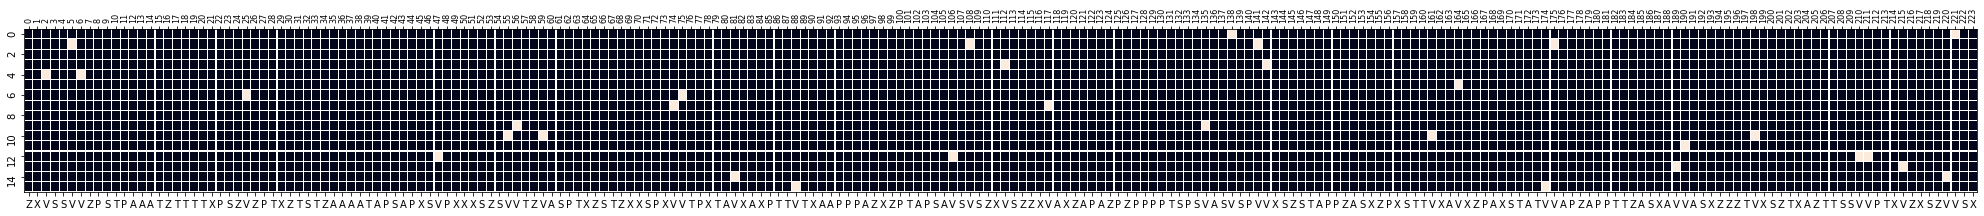

In [23]:
string_idx = 49
step = 0

predicted_chars = np.unique([charsMC.columns[np.where(charsMC == idx)[1]][0] 
                  for idx in np.where(results.iloc[string_idx]['htm_preds'][step])[1]])
multiplying_arr = np.zeros(N)
for k in range(len(predicted_chars)):
    multiplying_arr[list(charsMC[predicted_chars[k]])] = 1/(k+1)

plot_predictions=[results.iloc[string_idx]['htm_preds'][step][j]*multiplying_arr
                  for j in range(M)]

f = plt.figure(figsize=(28,4))
f = sns.heatmap(plot_predictions, cmap='cubehelix', vmax=1, vmin=0, cbar=False, linewidth=0.1, xticklabels=xticks_plot)
ax_ = plt.twiny()
ax_.set_xticks(f.get_xticks())
ax_.set_xbound(f.get_xbound())
ax_.set_xticklabels([str(i) for i in np.arange(N)], rotation=90, fontsize=8)
ax_.tick_params(grid_alpha=0)
plt.show()

<IPython.core.display.Javascript object>


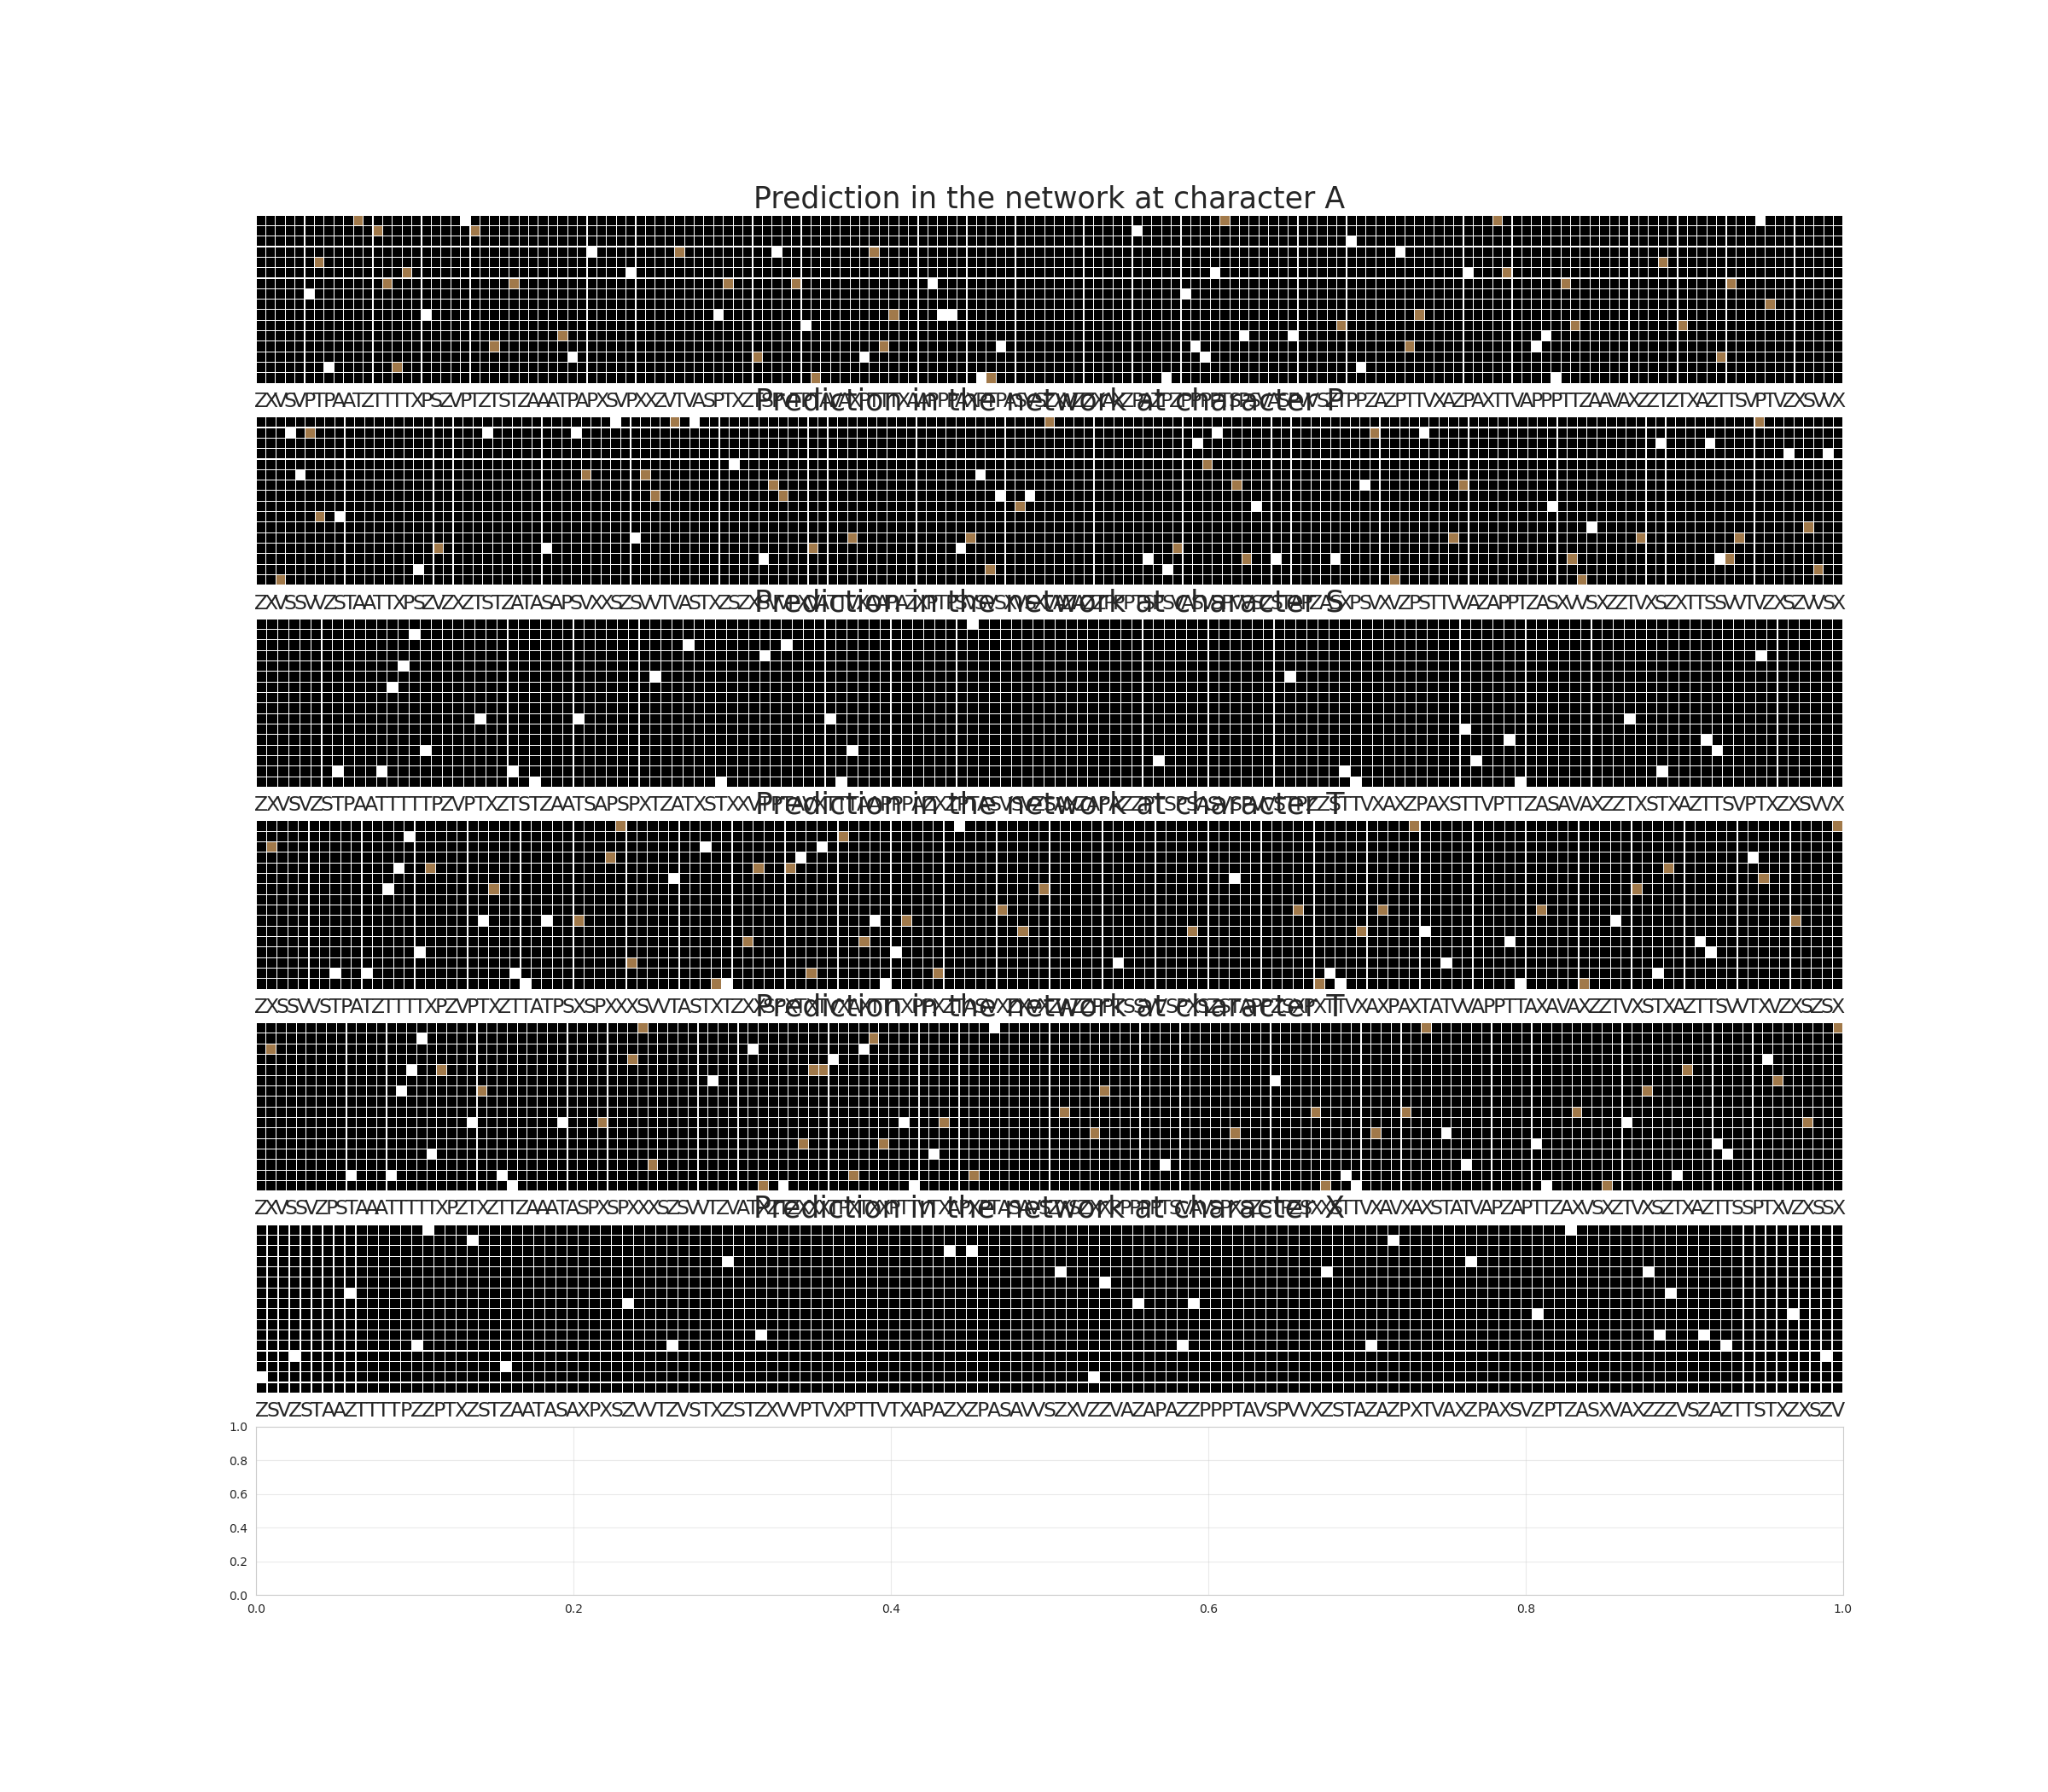

In [113]:
string_idx = 278

sns.set_style("whitegrid")
res_string = results.iloc[string_idx]
string_len = len(res_string.name)
fig, axes = plt.subplots(string_len,1, figsize=(24,3*string_len))
all_cols = [c for c in range(N)]

for step in range(string_len-1):
    char = res_string.name[step]

    predicted_chars = np.unique([charsMC.columns[np.where(charsMC == idx)[1]][0] for idx in np.where(res_string['htm_preds'][step])[1]])
    multiplying_arr = np.zeros(N)
    for k in range(len(predicted_chars)):
        multiplying_arr[list(charsMC[predicted_chars[k]])] = 1/(k+1)

    plot_predictions=np.array([res_string['htm_preds'][step][j]*multiplying_arr for j in range(M)])
    
    unpredicted_cols = [col for col in all_cols if plot_predictions[:, col].any()==False]
    deleted_cols = random.choices(unpredicted_cols, k=int(len(unpredicted_cols)/1.8))
    undeleted_cols = set(all_cols) - set(deleted_cols)
    
    # Plot the current step's character's (cell) predictivity
    sns.heatmap(plot_predictions[:, list(undeleted_cols)], cmap='cubehelix',
                vmax=1, vmin=0, cbar=False, linewidth=0.1, xticklabels=xticks_plot[list(undeleted_cols)], ax=axes[step])
#     sns.heatmap(plot_predictions, 
#                 vmax=1, vmin=0, cbar=False, linewidth=0.1, xticklabels=xticks_plot, ax=axes[step])
    
    axes[step].set_xticklabels(axes[step].get_xticklabels(), fontsize=17)
    axes[step].set_yticklabels([])
    axes[step].set_title(f'Prediction in the network at character {char}', fontsize=25)

plt.show()

## Number of Dendrites on each Cell

In [75]:
%matplotlib notebook

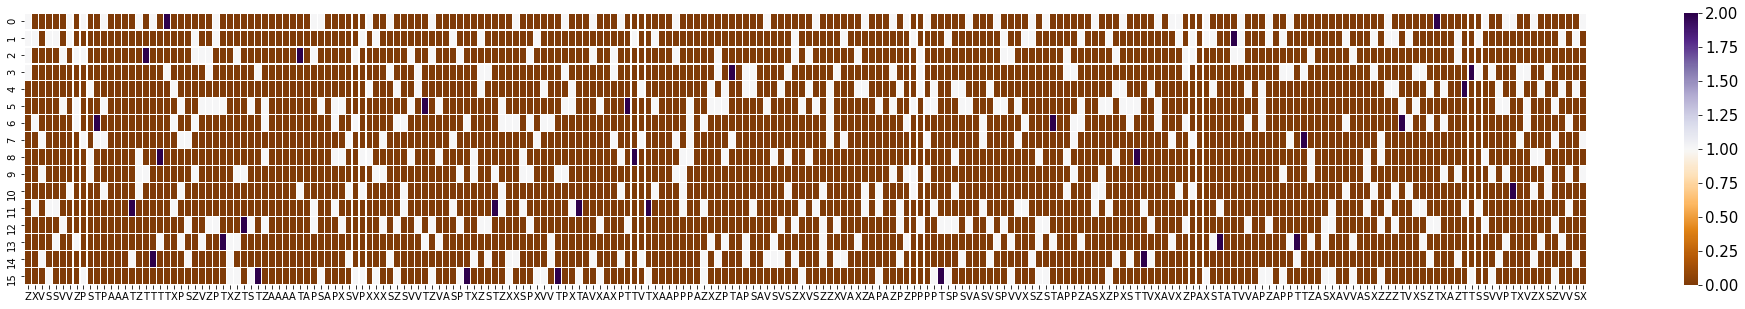

array([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1.])

2.0

In [74]:
countDendrites = np.zeros(shape=[M,N])

for i in range(M):
    for j in range(N):
        countDendrites[i,j] = exp.htm_network.net_arch[i, j].get_cell_numDendrites()

f = plt.figure(figsize=(35,5))
ax = f.add_subplot(111)
ax = sns.heatmap(countDendrites, linewidth=0.1, xticklabels=xticks_plot, cmap='PuOr')
cbar = ax.collections[0].colorbar
#cbar.set_label('Activation',size=18)
cbar.ax.tick_params(labelsize=15) 
plt.show()

display(countDendrites[0])
display(np.amax(countDendrites))

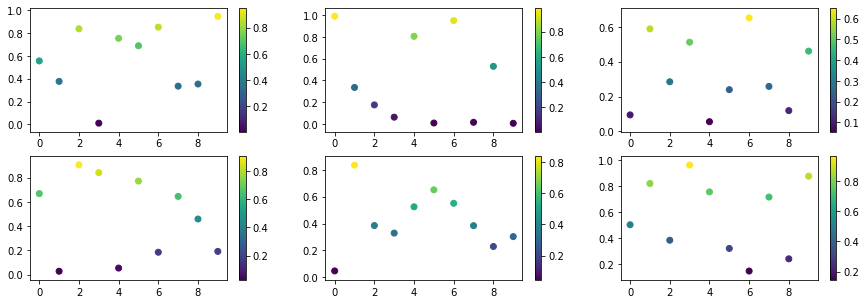

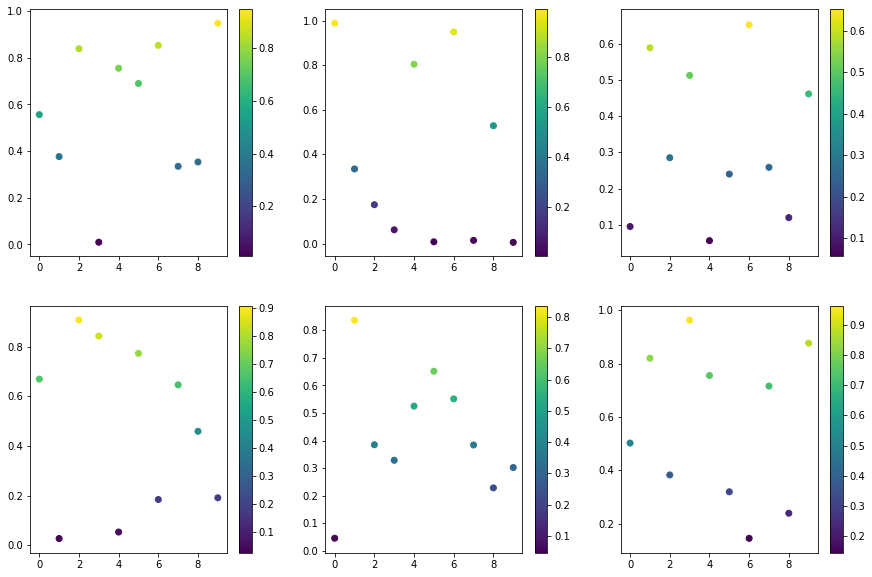

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x1 = x2 = np.arange(10)
y1 = y2 = c = np.random.rand(10,6)

# plt.figure(1)
# plt.subplots_adjust(hspace=.5,wspace=0.4)

# plt.figure(2)
# plt.subplots_adjust(hspace=.5,wspace=0.4)

for i in range(6):
    plt.figure(1, figsize=(15,5))
    plt.subplot(2,3,i+1)
    sc1 = plt.scatter(x1,y1[:,i], c=c[:,i])
    plt.colorbar(sc1)

    plt.figure(2, figsize=(15,10))
    plt.subplot(2,3,i+1)
    sc2 = plt.scatter(x1,y1[:,i], c=c[:,i])
    plt.colorbar(sc2)

plt.show()   
plt.close()